In [1]:
import torch

在运行反向传播函数之后，立即再次运行它，看看会发生什么。

结局是报错

In [2]:
'''
Author: Blueness
Date: 2022-11-20 12:57:05
LastEditTime: 2022-11-20 23:43:45
LastEditors: Blueness
Description: 
FilePath: \d2l-notes\Lesson07\7-homework.ipynb
'''
x = torch.tensor(2., requires_grad=True)
y = x ** 2

In [3]:
y.backward()
# y.backward()

重新设计一个求控制流梯度的例子，运行并分析结果。

胡乱写了个，导数结果为inf(无限大)

In [4]:
def f(x):
    for i in range(10):
        if x > 0:
            x = x ** 2
        else:
            x = x ** -2
        print(x)
    return x

In [5]:
x = torch.randn(size=(), requires_grad=True)

In [6]:
d = f(x)
d.backward()

tensor(0.5211, grad_fn=<PowBackward0>)
tensor(0.2715, grad_fn=<PowBackward0>)
tensor(0.0737, grad_fn=<PowBackward0>)
tensor(0.0054, grad_fn=<PowBackward0>)
tensor(2.9542e-05, grad_fn=<PowBackward0>)
tensor(8.7273e-10, grad_fn=<PowBackward0>)
tensor(7.6165e-19, grad_fn=<PowBackward0>)
tensor(5.8011e-37, grad_fn=<PowBackward0>)
tensor(0., grad_fn=<PowBackward0>)
tensor(inf, grad_fn=<PowBackward0>)


In [7]:
x.grad

tensor(-inf)

使$f(x)=sin(x)$，绘制$f(x)$和$\frac{d f(x)}{d x}$

In [8]:
%matplotlib inline
from matplotlib_inline import backend_inline
from d2l import torch as d2l
import math

In [9]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [10]:
#@save
def plot(
    X,
    Y=None,
    xlabel=None,
    ylabel=None,
    legend=None, xlim=None,
    ylim=None, xscale='linear', yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), figsize=(10, 2.5), axes=None):

    """绘制数据点"""
    if legend is None:
        legend = []

    axes = axes if axes else d2l.plt.gca()

    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

    """设置matplotlib的图表大小"""
    d2l.plt.rcParams['figure.figsize'] = figsize

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or
                isinstance(X, list) and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

In [21]:
x = torch.arange(0, 5 * math.pi, 0.1, requires_grad=True)
y = torch.sin(x)
y.sum().backward()

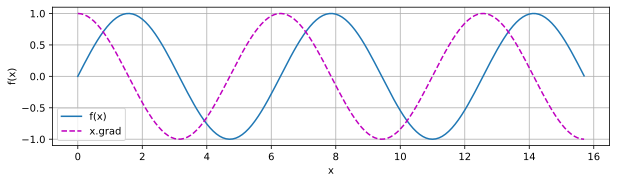

In [22]:
plot(x.detach().numpy(),
    [y.detach().numpy(), x.grad.detach().numpy()],
    'x',
    'f(x)',
    legend=['f(x)', 'x.grad'])